In [1]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes = filmes.set_index('filme_id')
filmes.head()

,titulo,generos
filme_id,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuario_id', 'filme_id', 'nota', 'momento']
notas.head()

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [3]:
notas['filme_id'].value_counts()

filme_id
356       153
296       151
318       147
2571      134
593       131
         ... 
85316       1
86066       1
171023      1
88345       1
31923       1
Name: count, Length: 6433, dtype: int64

In [4]:
filmes.loc[318]

titulo     Shawshank Redemption, The (1994)
generos                         Crime|Drama
Name: 318, dtype: object

In [5]:
total_de_votos = notas['filme_id'].value_counts()
total_de_votos.head()

filme_id
356     153
296     151
318     147
2571    134
593     131
Name: count, dtype: int64

In [6]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filme_id,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0
2,Jumanji (1995),Adventure|Children|Fantasy,45.0
3,Grumpier Old Men (1995),Comedy|Romance,26.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,5.0
5,Father of the Bride Part II (1995),Comedy,25.0


In [7]:
filmes.sort_values('total_de_votos', ascending=False).head()

,titulo,generos,total_de_votos
filme_id,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,153.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,151.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,134.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,131.0


In [8]:
notas_medias = notas.groupby('filme_id').mean()['nota']

In [9]:
filmes['nota_media'] = notas_medias
filmes.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filme_id,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,153.0,4.104575
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,151.0,4.029801
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,134.0,4.152985
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,131.0,4.148855
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,4.256303
110,Braveheart (1995),Action|Drama|War,110.0,4.004545
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,109.0,3.761468
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196


In [10]:
filmes.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filme_id,,,,
86721,Idiots and Angels (2008),Animation|Drama|Fantasy,1.0,5.0
2204,Saboteur (1942),Mystery|Thriller,1.0,5.0
93022,Miss Nobody (2010),Comedy|Crime,1.0,5.0
93008,"Very Potter Sequel, A (2010)",Comedy|Musical,1.0,5.0
120478,The Salt of the Earth (2014),Documentary,1.0,5.0
7008,Last Tango in Paris (Ultimo tango a Parigi) (1...,Drama|Romance,2.0,5.0
92643,Monsieur Lazhar (2011),Children|Comedy|Drama,1.0,5.0
92494,Dylan Moran: Monster (2004),Comedy|Documentary,1.0,5.0
31364,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller,1.0,5.0


In [11]:
filmes.query('total_de_votos >= 10').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filme_id,,,,
1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,12.0,4.666667
898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,13.0,4.576923
922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,14.0,4.464286
926,All About Eve (1950),Drama,10.0,4.450000
1250,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,19.0,4.421053
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,22.0,4.409091
1209,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,11.0,4.363636
475,In the Name of the Father (1993),Drama,14.0,4.357143


In [12]:
filmes_com_50_votos = filmes.query('total_de_votos >= 50').sort_values('nota_media', ascending=False).head(10)
filmes_com_50_votos.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filme_id,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,67.0,4.350746
1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,70.0,4.307143
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,4.256303
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,105.0,4.252381
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,94.0,4.250000
1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,99.0,4.227273
1193,One Flew Over the Cuckoo's Nest (1975),Drama,66.0,4.227273
527,Schindler's List (1993),Drama|War,96.0,4.208333


In [13]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2, 5, 16, 13]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filme_id,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,107.0,3.897196
21,Get Shorty (1995),Comedy|Crime|Thriller,43.0,3.604651
19,Ace Ventura: When Nature Calls (1995),Comedy,39.0,2.756410
10,GoldenEye (1995),Action|Adventure|Thriller,59.0,3.516949
11,"American President, The (1995)",Comedy|Drama|Romance,32.0,3.906250
7,Sabrina (1995),Comedy|Romance,31.0,3.274194
2,Jumanji (1995),Adventure|Children|Fantasy,45.0,3.366667
5,Father of the Bride Part II (1995),Comedy,25.0,3.480000
16,Casino (1995),Crime|Drama,34.0,4.161765


In [14]:
aventura_infantil_animacao = filmes_com_50_votos.query('generos=="Adventure|Animation|Children"')
aventura_infantil_animacao.drop(eu_assisti, errors='ignore').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filme_id,,,,


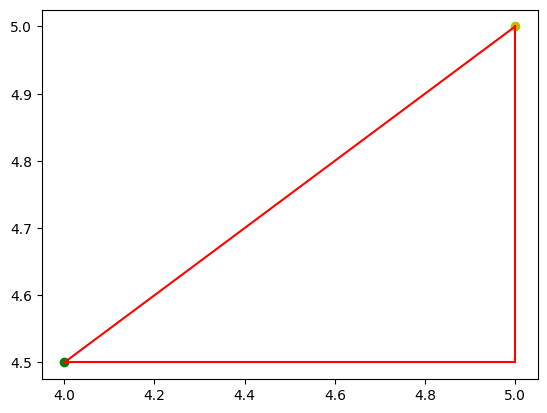

In [15]:
import matplotlib.pyplot as plt
plt.plot(4,4.5, 'go')
plt.plot(5,5, 'yo')

plt.plot([4, 5], [4.5, 4.5], linestyle='-', color='r')
plt.plot([4, 5], [4.5, 5], linestyle='-', color='r')
plt.plot([5, 5], [4.5, 5], linestyle='-', color='r')

In [16]:
import numpy as np
joao = np.array([4, 4.5])
maria = np.array([5, 5])
joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt
def pitagoras(a,b):
  return np.linalg.norm(a-b)

In [18]:
pitagoras(joao, maria)

1.118033988749895

In [19]:
notas_do_usuario = notas.query('usuario_id==2')
notas_do_usuario = notas_do_usuario[['filme_id', 'nota']].set_index('filme_id')

In [20]:
notas_do_usuario.loc[333]

nota    4.0
Name: 333, dtype: float64

In [21]:
def notas_do_usuario(usuario_id):
  notas_do_usuario = notas.query('usuario_id==%d' % usuario_id)
  notas_do_usuario = notas_do_usuario[['filme_id', 'nota']].set_index('filme_id')
  return notas_do_usuario

notas_do_usuario(2)

,nota
filme_id,
318,3.0
333,4.0
1704,4.5
3578,4.0
6874,4.0
8798,3.5
46970,4.0
48516,4.0
58559,4.5


In [22]:
usuario1 = notas_do_usuario(1)
usuario2 = notas_do_usuario(2)

diferenca = usuario1.join(usuario2, lsuffix='_esquerda', rsuffix='_direita').dropna()

In [23]:
pitagoras(diferenca['nota_esquerda'], diferenca['nota_direita'])

1.4142135623730951

In [24]:
def distancias_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferenca = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  distancia = pitagoras(diferenca['nota_esquerda'], diferenca['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [25]:
distancias_de_usuarios(3, 60)

[3, 60, 4.5]

In [26]:
qtd_usuario = len(notas['usuario_id'].unique())
print(f'Temos {qtd_usuario} usuários')

Temos 288 usuários


In [27]:
def distancia_de_todos(me):
  distancias = []
  for usuario_id in notas['usuario_id'].unique():
    informacoes = distancias_de_usuarios(me, usuario_id)
    distancias.append(informacoes)
  return distancias



distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [28]:
def distancia_de_todos(me):
  todos_os_usuarios = notas['usuario_id'].unique()
  distancias = [distancias_de_usuarios(me, usuario_id) for usuario_id in todos_os_usuarios]
  return distancias



distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [29]:
def distancia_de_todos(me):
  todos_os_usuarios = notas['usuario_id'].unique()
  distancias = [distancias_de_usuarios(me, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns=['usuario_id1', 'usuario_id2', 'distancia'])
  return distancias



distancia_de_todos(1).head()

,usuario_id1,usuario_id2,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [32]:
def distancias_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferenca = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  if (len(diferenca) < minimo):
    return [usuario_id1, usuario_id2,10000]
  distancia = pitagoras(diferenca['nota_esquerda'], diferenca['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [33]:
distancia_de_todos(1).head()

,usuario_id1,usuario_id2,distancia
0,1,1,0.000000
1,1,2,10000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [49]:
def mais_proximo_de(me, n = None):
  distancias = distancia_de_todos(me, n = n)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('usuario_id2').drop(me)
  return distancias

In [44]:
mais_proximo_de(1)

,usuario_id1,distancia
usuario_id2,,
77,1,0.000000
49,1,1.000000
258,1,1.000000
9,1,1.000000
65,1,1.322876
...,...,...
245,1,10000.000000
257,1,10000.000000
250,1,10000.000000


In [57]:
def distancias_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferenca = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita').dropna()
  if (len(diferenca) < minimo):
    return None
  distancia = pitagoras(diferenca['nota_esquerda'], diferenca['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [65]:
def distancia_de_todos(voce_id, n = None):
    todos_os_usuarios = notas['usuario_id'].unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancias_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ['usuario_id1', 'usuario_id2', "distancia"])
    return distancias

In [66]:
mais_proximo_de(1, n = 50)

,usuario_id1,distancia
usuario_id2,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [69]:
voce = 1
similares = mais_proximo_de(voce, n = 50)
similar = similares.iloc[0].name
notas_do_simiular = notas_do_usuario(similar)
notas_do_usuario(voce).join(notas_do_simiular, lsuffix='_esquerda', rsuffix='_direita').dropna()

,nota_esquerda,nota_direita
filme_id,,
110,4.0,4.0
356,4.0,4.0
527,5.0,4.5
1097,5.0,4.5
1214,4.0,4.0
2028,4.0,4.5
2571,5.0,4.5


In [72]:
def sugere_para(voce, n = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = mais_proximo_de(voce, n = 50)
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
    recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)


In [74]:
sugere_para(1, n = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filme_id,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,60.0,3.866667
4022,4.5,Cast Away (2000),Drama,44.0,3.602273
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,25.0,3.800000
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,61.0,4.008197
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,33.0,3.954545


In [75]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filme_id,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,60.0,3.866667
4022,4.5,Cast Away (2000),Drama,44.0,3.602273
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,25.0,3.800000
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,61.0,4.008197
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,33.0,3.954545


In [76]:
def mais_proximo_de(me, n = None, n_mais_proximos = 10):
  distancias = distancia_de_todos(me, n = n)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('usuario_id2').drop(me)
  return distancias.head(n_mais_proximos)

In [78]:
mais_proximo_de(1, n_mais_proximos=2)

,usuario_id1,distancia
usuario_id2,,
77,1,0.0
49,1,1.0


In [82]:
def sugere_para(voce, n_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximo_de(voce, n_mais_proximos = n_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuario_id").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filme_id").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [84]:
sugere_para(1, n = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filme_id,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,6.0,4.333333
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,38.0,4.223684
475,5.0,In the Name of the Father (1993),Drama,14.0,4.357143
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,51.0,3.901961
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,80.0,4.081250


In [90]:
def knn(voce_id, k_mais_proximos=10, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("usuario_id2").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [91]:
def sugere_para(voce, k_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuario_id").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filme_id").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [92]:
def novo_usuario(dados):
  novo_usuario = notas['usuario_id'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=["filme_id", "nota"])
  notas_do_usuario_novo['usuario_id'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [93]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas.tail()

,usuario_id,filme_id,nota,momento
5,290,1,2.0,NaN
6,290,7,0.5,NaN
7,290,2,2.0,NaN
8,290,1196,1.0,NaN
9,290,260,1.0,NaN


In [96]:
sugere_para(290).head()

,nota,titulo,generos,total_de_votos,nota_media
filme_id,,,,,
2022,5.0,"Last Temptation of Christ, The (1988)",Drama,2.0,4.000000
3000,5.0,Princess Mononoke (Mononoke-hime) (1997),Action|Adventure|Animation|Drama|Fantasy,19.0,3.921053
115617,5.0,Big Hero 6 (2014),Action|Animation|Comedy,21.0,4.119048
89904,5.0,The Artist (2011),Comedy|Drama|Romance,4.0,4.750000
1237,5.0,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,6.0,4.583333


In [98]:
notas = notas.set_index("filme_id").loc[filmes_com_50_votos.index]
notas.head()

,usuario_id,nota,momento
filme_id,,,
318,2,3.0,1.445715e+09
318,5,3.0,8.474349e+08
318,6,5.0,8.455532e+08
318,8,5.0,8.394635e+08
318,11,4.0,9.021551e+08


In [99]:
notas = notas.reset_index()
notas.head()

,filme_id,usuario_id,nota,momento
0,318,2,3.0,1.445715e+09
1,318,5,3.0,8.474349e+08
2,318,6,5.0,8.455532e+08
3,318,8,5.0,8.394635e+08
4,318,11,4.0,9.021551e+08


In [100]:
def sugere_para(voce, k_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuario_id").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filme_id").mean()[["nota"]]
  aparicoes = notas_dos_similares.groupby("filme_id").count()[['nota']]

  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes_nos_usuarios")
  recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minimo)
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
  return recomendacoes.join(filmes)

In [102]:
def knn(voce_id, k_mais_proximos=10, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("usuario_id2").drop(voce_id, errors='ignore')
  return distancias.head(k_mais_proximos)

In [104]:
sugere_para(1, n=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filme_id,,,,,,
318,4.833333,6,"Shawshank Redemption, The (1994)",Crime|Drama,147.0,4.411565
1193,4.200000,5,One Flew Over the Cuckoo's Nest (1975),Drama,66.0,4.227273
